## Retail Project

In [1]:
import numpy as np
import pandas as pd
import nltk
import random

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Performance
%load_ext memory_profiler

In [2]:
# Read
data = pd.ExcelFile("retail dataset.xlsx")
df = data.parse("Sheet1", header=1)
df = df.drop(["Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21","Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26"], axis = 1)
df["LABEL"] = 0
df.loc[df.RATING >= 3,"LABEL"] = 1

In [19]:
print(df.head())
df.info()

  STERLINGEXTERNALALIAS  AGE              IID  REVIEW_ID  \
0              40175747   33  100008000000000   73990099   
1         4130200000000   34  100000000000000   67591147   
2         4130080000000   60  100000000000000   56579841   
3         4123200000000   50  100001000000000   56445604   
4         4110530000000   47  100001000000000   73214993   

                     TITLE                                        REVIEW_TEXT  \
0                      NaN  absolutely wonderful - silky and sexy and comf...   
1                      NaN  Love this dress!  It's sooo pretty.  I happene...   
2  Some major design flaws  I had such high hopes for this dress and reall...   
3         My Favorite Buy!  I love, love, love this jumpsuit. It's fun, fl...   
4         Flattering shirt  This shirt is very flattering to all due to th...   

   RATING  RATING_RANGE  RECOMMENDED_IND  NUM_FEEDBACKS  \
0       4             5                1              0   
1       5             5           

## PreProcessing

In [3]:
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

ps = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

In [4]:
def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ')
    words = tokenizer.tokenize(txt)
    words = [w for w in words if not w in stop_words]
    words = [ps.stem(w) for w in words] #Stemmed version
    return words

## Functions

In [24]:
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

In [25]:
def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    print(rslt)

In [26]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [27]:
from os import path
from PIL import Image

# Model = np.array(Image.open("model.png"))
# Failed attempted at adding a form to wordcloud

In [28]:
# https://www.kaggle.com/longdoan/word-cloud-with-python
# https://github.com/amueller/word_cloud/issues/134
# https://amueller.github.io/word_cloud/auto_examples/masked.html

def cloud(text):
    mpl.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
    mpl.rcParams['font.size']=12                #10 
    mpl.rcParams['savefig.dpi']=100             #72 
    mpl.rcParams['figure.subplot.bottom']=.1 

    stopwords = set(STOPWORDS) # Redundant
    
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))

    print(wordcloud)

    fig = plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    #fig.savefig("word1.png", dpi=900)

## Word Distribution and Word Cloud

         Frequency
Word              
dress        10969
love         10634
fit          10613
size          9809
look          7935
wear          7487
top           7468
color         6727
like          6711
great         5849
5             5097
order         4389
would         4366
small         4232
fabric        4167
perfect       3736
littl         3635
nice          3572
realli        3451
flatter       3437
None


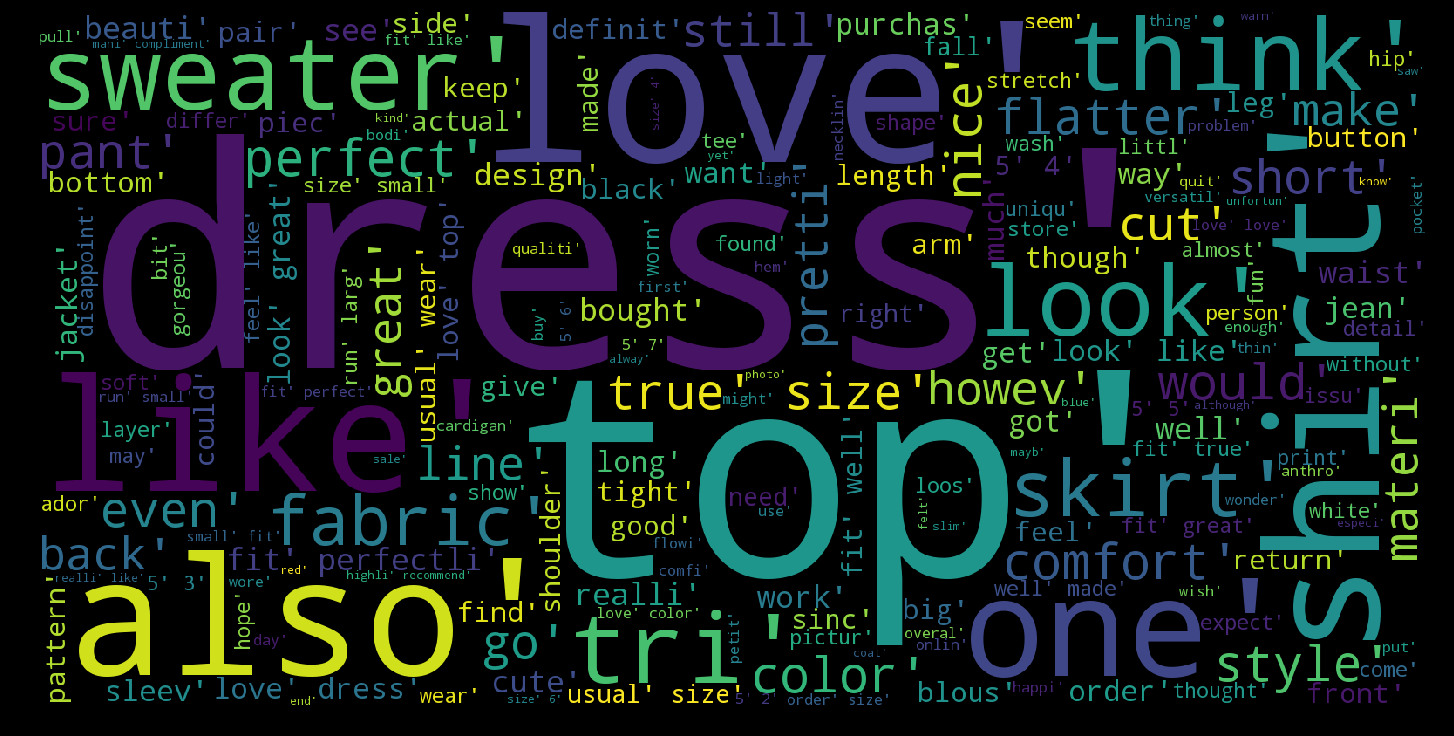

None
None


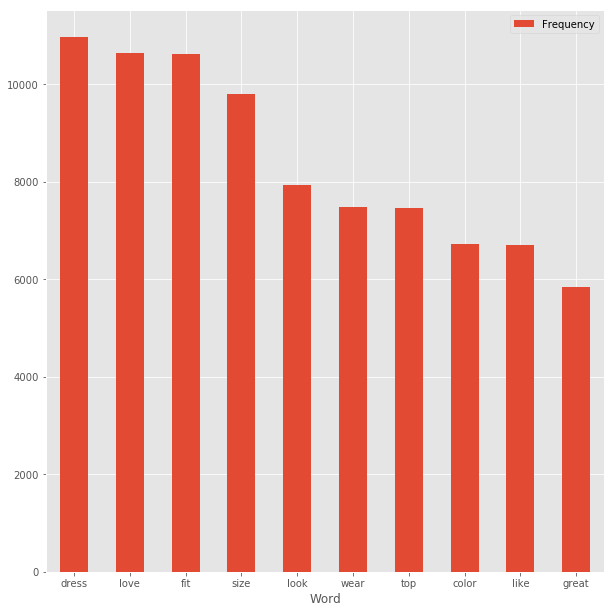

In [29]:
# Highly Raited
out = preprocessing(df[df.RATING >= 3]['REVIEW_TEXT'])
print(wordfreq(out,20))
print(cloud(out))
print(wordfreqviz(out,10))

        Frequency
Word             
look         1419
dress        1218
like         1164
size          912
top           907
fit           899
love          761
would         743
fabric        726
order         625
back          615
wear          588
color         573
small         521
return        512
realli        474
shirt         468
5             453
tri           440
materi        438
None


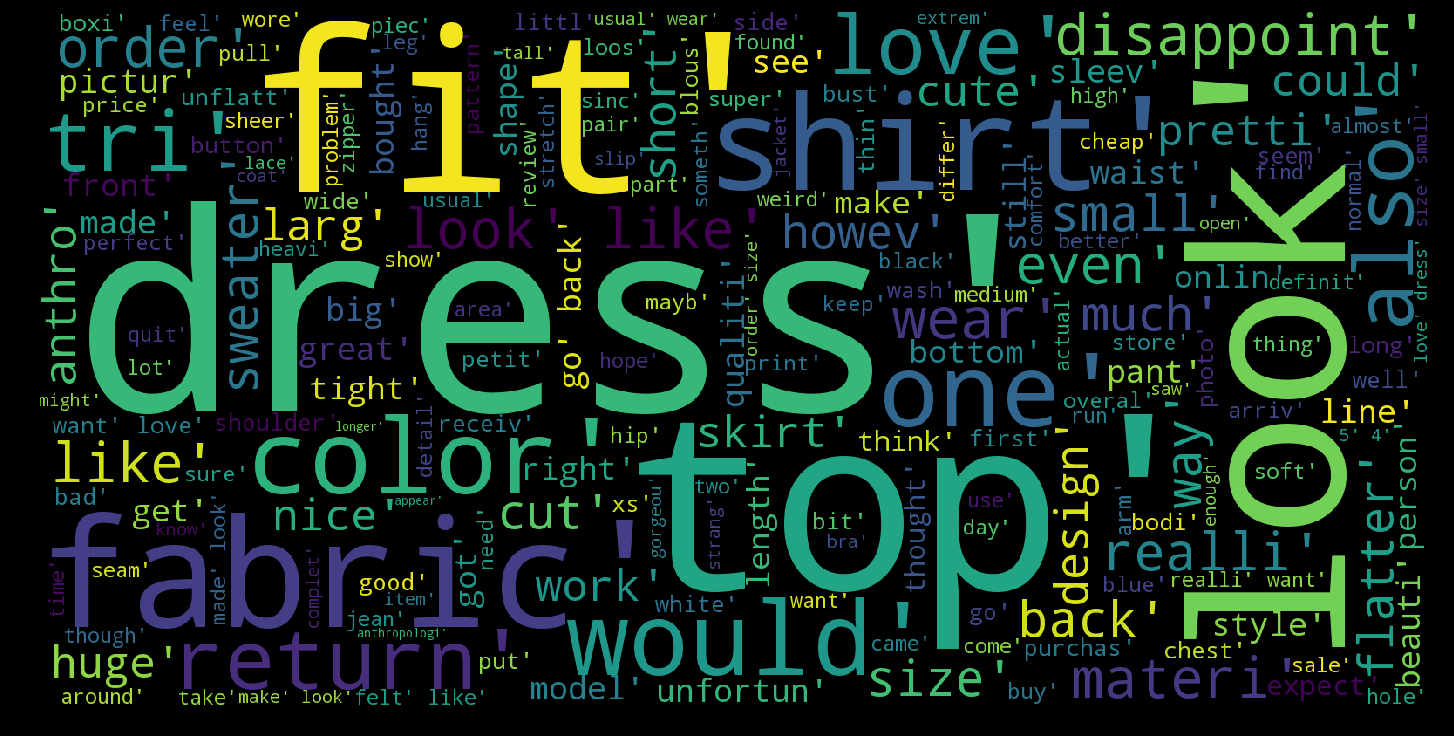

None
None


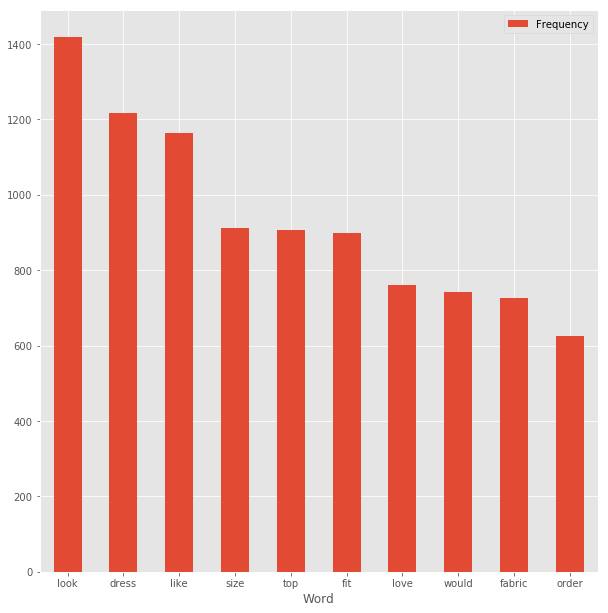

In [30]:
# Low Raited
out = preprocessing(df[df.RATING < 3]['REVIEW_TEXT'])
print(wordfreq(out,20))
print(cloud(out))
print(wordfreqviz(out,10))

## Supervised Learning

In [5]:
data = df[["LABEL", "REVIEW_TEXT"]]
data['text'] = data.REVIEW_TEXT.astype(str).str.lower() # turn into lower case text
data['text'] = data.apply(lambda row: tokenizer.tokenize(row['text']), axis=1) # apply tokenize to each row
data['text'] = data['text'].apply(lambda x: [w for w in x if not w in stop_words]) # remove stopwords from each row
data['text'] = data['text'].apply(lambda x: [ps.stem(w) for w in x]) # apply stemming to each row
all_words = nltk.FreqDist(preprocessing(df['REVIEW_TEXT'])) # calculate word occurence from whole block of text
word_features= list(all_words.keys())[:3000] # 5000 most recurring unique words
data = data.drop("REVIEW_TEXT", axis=1)
# data.to_csv("modeldata.csv", header=True, index=False)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [6]:
labtext= list(zip(data.text, (data.LABEL))) 
# Tuple each review with its label (1= greater/equal to 3, 0= under 3)

In [7]:
# Function to create model features
# for each review, records which uniqeue words out of the whole text body are present
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [8]:
# Apply function to data
featuresets = [(find_features(text), LABEL) for (text, LABEL) in labtext]
len(featuresets)

23486

In [11]:
import pickle
#with open('featuresets.pickle', 'wb') as f: pickle.dump(featuresets, f)
#%reset
with open('featuresets.pickle', 'rb') as f: featuresets = pickle.load(f)

In [12]:
training_set = featuresets[:15000]
testing_set = featuresets[15000:]

## Naive Bayes

In [14]:
%%time
%%memit
import nltk
classifier = nltk.NaiveBayesClassifier.train(training_set)
# Very scalable algorithm
# Posterior = prior_occurence * likelihood / evidence

AttributeError: module '__main__' has no attribute '__spec__'

In [ ]:
classifier_f = open("naivebayes.pickle", "rb")
classifier = pickle.load(classifier_f)
classifier_f.close()

In [116]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)

Classifier accuracy percent: 89.2764553382


In [117]:
classifier.show_most_informative_features(25)

Most Informative Features
                   worst = True                0 : 1      =     34.5 : 1.0
                    asap = True                0 : 1      =     33.6 : 1.0
               disintegr = True                0 : 1      =     32.4 : 1.0
                versatil = True                1 : 0      =     30.5 : 1.0
                  disast = True                0 : 1      =     26.5 : 1.0
                   charg = True                0 : 1      =     26.5 : 1.0
                      aw = True                0 : 1      =     24.1 : 1.0
                  bizarr = True                0 : 1      =     23.0 : 1.0
                 horribl = True                0 : 1      =     21.5 : 1.0
                  repair = True                0 : 1      =     20.6 : 1.0
                  decept = True                0 : 1      =     20.6 : 1.0
                     rag = True                0 : 1      =     20.6 : 1.0
                 horrifi = True                0 : 1      =     20.6 : 1.0

In [119]:
import pickle
save_classifier = open("naivebayes.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

## Modeling with Scikitlearn

In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

In [ ]:
print("And were back")